<a href="https://colab.research.google.com/github/EmilioM1983/DataScience_IA/blob/main/EDA_kyphosis_in_childrens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen del proyecto

* En este proyecto, realizaremos un Anális exploratorio de datos (EDA) basico sobre el conjunto de datos de la enfermedad cifosis.
*La cifosis es una corvatura convexa anormalmente excesiva de la columna vertebral.
*El conjunto de datos contiene 81 filas y 4 columnas que representan datos sobre niños que se han sometido a cirugía correctiva de la columna vertebral.
  .Entradas: 1-Edad: en meses, 2-Numero: el número de vertebras afectadas, 3-Inicio: el número de la primera vertebra (la más alta) operada.
  .Salidas: cifosis que representa un factor con niveles ausentes presentes que indica si se presento una cifosis (un tipo de deformación) despues de la operación.

*Realizar las siguiente tareas:
  1. Importar el archivo kyphosis.csv con pandas.
  2. Realizar un EDA basico.
  3. Enumerar la edad media, minima y maxima (en años) considerada en este estudio utilizando 2 metodos.
  4. Representar la matriz de correlaciones.
  5. Convierte el tipo de datos de la columna edad de int64 a float64.
  6. Definir una funcion que convierta la edad de meses a años.
  7. Aplicar la funcion a la columna edad y añadir los resultados en una nueva columna titulada "Edad en años".
  8. ¿Cuales son las caracteristicas del niño mayor y menor de este estudio?
  9. Escala la columna edad sin procesar (en meses) utilizando la estandarizacion y normalizacion. Realice una comprobación de sanidad.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
cifosis_df = pd.read_csv('kyphosis.csv')
cifosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [51]:
cifosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [52]:
cifosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#3. Enumerar la edad media, minima y maxima (en años) considerada en este estudio utilizando 2 metodos.

In [53]:
cifosis_df['Edad en años'] = cifosis_df['Age']/12
cifosis_df

,Kyphosis,Age,Number,Start,Edad en años
0,absent,71,3,5,5.916667
1,absent,158,3,14,13.166667
2,present,128,4,5,10.666667
3,absent,2,5,1,0.166667
4,absent,1,4,15,0.083333
...,...,...,...,...,...
76,present,157,3,13,13.083333
77,absent,26,7,13,2.166667
78,absent,120,2,13,10.000000
79,present,42,7,6,3.500000


In [54]:
print(f'La edad media es: {cifosis_df["Edad en años"].mean()}')
print(f'La edad minima es: {cifosis_df["Edad en años"].min()}')
print(f'La edad maxima es: {cifosis_df["Edad en años"].max()}')

La edad media es: 6.971193415637861
La edad minima es: 0.08333333333333333
La edad maxima es: 17.166666666666668


#Representar la matriz de correlaciones.

In [55]:
cifosis_df = pd.read_csv('kyphosis.csv')
cifosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


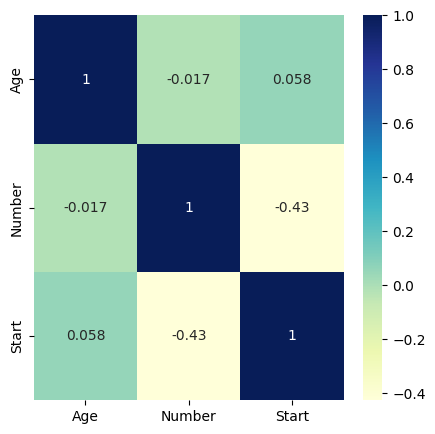

In [56]:
correlaciones = cifosis_df.select_dtypes(include=['float64', 'int64']).corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(correlaciones, annot=True, cmap = "YlGnBu")
plt.show()


#5. Convierte el tipo de datos de la columna edad de int64 a float64.

In [57]:
cifosis_df['Age'] = cifosis_df['Age'].astype(float)
cifosis_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


#6. Definir una funcion que convierta la edad de meses a años.

In [58]:
def meses_a_años(meses):
    años = meses / 12
    return años

#7. Aplicar la funcion a la columna edad y añadir los resultados en una nueva columna titulada "Edad en años".

In [59]:
cifosis_df['Edad en años'] = cifosis_df['Age'].apply(meses_a_años)
cifosis_df

,Kyphosis,Age,Number,Start,Edad en años
0,absent,71.0,3,5,5.916667
1,absent,158.0,3,14,13.166667
2,present,128.0,4,5,10.666667
3,absent,2.0,5,1,0.166667
4,absent,1.0,4,15,0.083333
...,...,...,...,...,...
76,present,157.0,3,13,13.083333
77,absent,26.0,7,13,2.166667
78,absent,120.0,2,13,10.000000
79,present,42.0,7,6,3.500000


#8. ¿Cuales son las caracteristicas del niño mayor y menor de este estudio?

In [60]:
print(cifosis_df.loc[cifosis_df['Edad en años'].idxmax()])
print(cifosis_df.loc[cifosis_df['Edad en años'].idxmin()])

Kyphosis           absent
Age                 206.0
Number                  4
Start                  10
Edad en años    17.166667
Name: 73, dtype: object
Kyphosis          absent
Age                  1.0
Number                 4
Start                 15
Edad en años    0.083333
Name: 4, dtype: object


#9. Escala la columna edad sin procesar (en meses) utilizando la estandarizacion y normalizacion. Realice una comprobación de sanidad.

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
cifosis_df['Age_normal'] = scaler.fit_transform(cifosis_df[['Age']])
cifosis_df

,Kyphosis,Age,Number,Start,Edad en años,Age_normal
0,absent,71.0,3,5,5.916667,0.341463
1,absent,158.0,3,14,13.166667,0.765854
2,present,128.0,4,5,10.666667,0.619512
3,absent,2.0,5,1,0.166667,0.004878
4,absent,1.0,4,15,0.083333,0.000000
...,...,...,...,...,...,...
76,present,157.0,3,13,13.083333,0.760976
77,absent,26.0,7,13,2.166667,0.121951
78,absent,120.0,2,13,10.000000,0.580488
79,present,42.0,7,6,3.500000,0.200000


In [62]:
cifosis_df['Age_normal'].describe()

,Age_normal
count,81.000000
mean,0.403192
std,0.283435
min,0.000000
25%,0.121951
50%,0.419512
75%,0.629268
max,1.000000


In [63]:
scaler = StandardScaler()
cifosis_df['Age_standar'] = scaler.fit_transform(cifosis_df[['Age']])
cifosis_df

,Kyphosis,Age,Number,Start,Edad en años,Age_normal,Age_standar
0,absent,71.0,3,5,5.916667,0.341463,-0.219143
1,absent,158.0,3,14,13.166667,0.765854,1.287494
2,present,128.0,4,5,10.666667,0.619512,0.767964
3,absent,2.0,5,1,0.166667,0.004878,-1.414063
4,absent,1.0,4,15,0.083333,0.000000,-1.431381
...,...,...,...,...,...,...,...
76,present,157.0,3,13,13.083333,0.760976,1.270177
77,absent,26.0,7,13,2.166667,0.121951,-0.998439
78,absent,120.0,2,13,10.000000,0.580488,0.629423
79,present,42.0,7,6,3.500000,0.200000,-0.721356


In [64]:
cifosis_df['Age_standar'].describe().round(2)

,Age_standar
count,81.00
mean,0.00
std,1.01
min,-1.43
25%,-1.00
50%,0.06
75%,0.80
max,2.12
